#IMPORTING REQUIRED LIBRARIES

In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop
#from google.colab import drive

In [ ]:
!pip install tensorflow-gpu
!pip install graphviz

In [ ]:
#Using Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

#TRACKING PATH

In [ ]:
##Using Google Drive
from pathlib import Path
train_path=Path(r'C:\Ubasagan\COVID-NEW\Train\\')
test_path=Path(r'C:\Ubasagan\COVID-NEW\Test\\')
print(train_path)
print(test_path)

C:\Ubasagan\COVID-NEW\Train
C:\Ubasagan\COVID-NEW\Test


In [ ]:
#Collecting paths of datasets
train_img_path=train_path.glob('*/*')
test_img_path=test_path.glob('*/*')
#Convert Generator Objects to List of Elements
train_img_path=list(train_img_path)
test_img_path=list(test_img_path)
#print(train_img_path[0:])
print(test_img_path[0:])


[WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(0).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(1).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(10).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(100).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(101).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(102).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(103).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(104).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(105).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(106).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(107).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(108).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(109).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID19(11).jpg'), WindowsPath('C:/Ubasagan/COVID-NEW/Test/COVID19/COVID

In [ ]:
#Convert Posixpath to List of strings
train_img_path = list(map(lambda x : str(x) , train_img_path))
test_img_path = list(map(lambda x : str(x) , test_img_path)) 
print("Train Image Length: {}".format(len(train_img_path)))
print("Test Image Length: {}".format(len(test_img_path)))

Train Image Length: 4400
Test Image Length: 901


In [ ]:
#Counting Train and Test COVID and Normal Image 
def count_img(img):
  covid=0
  normal=0
  for i in list(img):
    if(i.split('\\')[-2]=='COVID19'):                              #split('\\') in jupyter
      covid+=1
    else:
      normal+=1
  return normal,covid
len_train_normal,len_train_covid=count_img(train_img_path)
len_test_normal,len_test_covid=count_img(test_img_path)
print('Train Normal: {}'.format(len_train_normal))
print('Train COVID: {}'.format(len_train_covid))
print('Test Normal: {}'.format(len_test_normal))
print('Test COVID: {}'.format(len_test_covid))


Train Normal: 2400
Train COVID: 2000
Test Normal: 501
Test COVID: 400


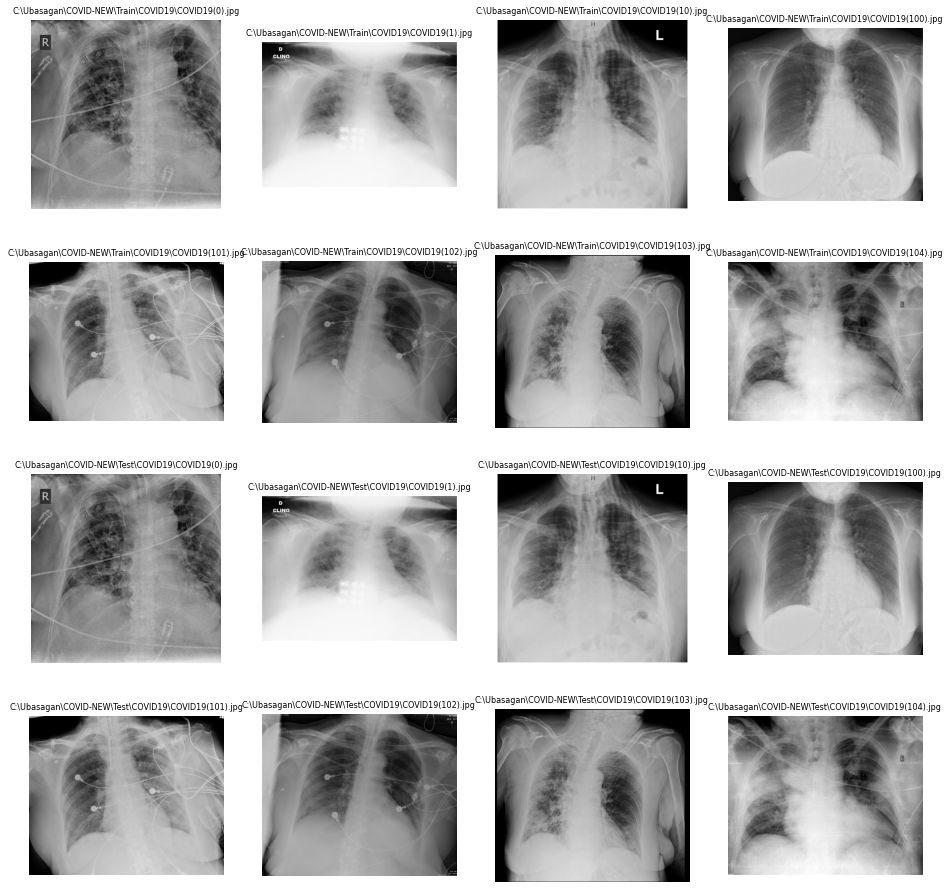

In [ ]:
##Image Visualization
L_grid = 4
W_grid = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(16,16)

covid_grid = [img for img in list(train_img_path)[0:8]]
normal_grid = [img for img in list(test_img_path)[0:8]]
for i , img_path in enumerate(covid_grid+normal_grid):
  img_nam=img_path.split('/')[-1]
  axes =plt.subplot(L_grid,W_grid,i+1)
  axes.axis('Off')
  img = mpimg.imread(img_path)
  axes.set_title(img_nam,fontsize=8)
  plt.imshow(img,cmap='gray')
plt.show()


# Simple CNN Implementation

In [ ]:
#Convert Image to Array
target_image_size=(150,150)
train_imgs_files=[img for img in list(train_img_path)]
test_imgs_files=[img for img in list(test_img_path)]
train_imgs = [img_to_array(load_img(img_path, target_size=target_image_size)) for img_path in train_imgs_files]
test_imgs = [img_to_array(load_img(img_path, target_size=target_image_size)) for img_path in test_imgs_files]
train_imgs=np.array(train_imgs)
test_imgs=np.array(test_imgs)
print(train_imgs.shape)
print(test_imgs.shape)


(4400, 150, 150, 3)
(901, 150, 150, 3)


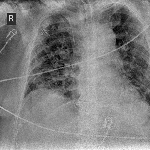

In [ ]:
#Conversion of Array to Image
array_to_img(train_imgs[0])

In [ ]:
##Labels for Train and Test Sets
train_imgs_labels =[label.split('\\')[4] for label in train_imgs_files]
test_imgs_labels = [label.split('\\')[4] for label in test_imgs_files]
print(len(train_imgs_labels))
print(train_imgs_labels)

4400
['COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COV

In [ ]:
#Normalization of Train and Test Data
train_imgs_scaled=train_imgs.astype('float32')
test_imgs_scaled=test_imgs.astype('float32')
train_imgs_scaled /=255
test_imgs_scaled /=255
print(train_imgs_scaled.shape)
print(test_imgs_scaled.shape)

(4400, 150, 150, 3)
(901, 150, 150, 3)


In [ ]:
#Conversion of labels into Numerical values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_labels_enc=encoder.fit_transform(train_imgs_labels)
test_labels_enc=encoder.transform(test_imgs_labels)
print(test_labels_enc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
#Some Initialization for Model
input_shape=(train_imgs_scaled.shape[1:])
epochs=30
batch_size=32
num_class=1
print(input_shape)

(150, 150, 3)


In [ ]:
##CNN Implementation
def create_model_init(input_shape,num_class):
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),
                     padding='SAME',
                     activation='relu',
                    input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,kernel_size=(3,3),
                     padding='SAME',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,kernel_size=(3,3),
                     padding='SAME',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(num_class,activation='sigmoid'))
    model.summary
    return model
model_init=create_model_init(input_shape,num_class)
model_init.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
history_init=model_init.fit(x=train_imgs_scaled,y=train_labels_enc,
                 validation_split=0.15,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1)

Epoch 1/30
117/117 [==============================] - 51s 427ms/step - loss: 0.9718 - accuracy: 0.7127 - val_loss: 2.8284 - val_accuracy: 0.4985
Epoch 2/30
117/117 [==============================] - 49s 417ms/step - loss: 0.2847 - accuracy: 0.8997 - val_loss: 0.7294 - val_accuracy: 0.7606
Epoch 3/30
117/117 [==============================] - 49s 419ms/step - loss: 0.1739 - accuracy: 0.9369 - val_loss: 1.7362 - val_accuracy: 0.7121
Epoch 4/30
117/117 [==============================] - 49s 423ms/step - loss: 0.1253 - accuracy: 0.9573 - val_loss: 1.6615 - val_accuracy: 0.7439
Epoch 5/30
117/117 [==============================] - 49s 422ms/step - loss: 0.0970 - accuracy: 0.9620 - val_loss: 2.7984 - val_accuracy: 0.7258
Epoch 6/30
117/117 [==============================] - 49s 421ms/step - loss: 0.0790 - accuracy: 0.9703 - val_loss: 2.6057 - val_accuracy: 0.7136
Epoch 7/30
117/117 [==============================] - 49s 419ms/step - loss: 0.0527 - accuracy: 0.9792 - val_loss: 3.6480 - val_ac

True

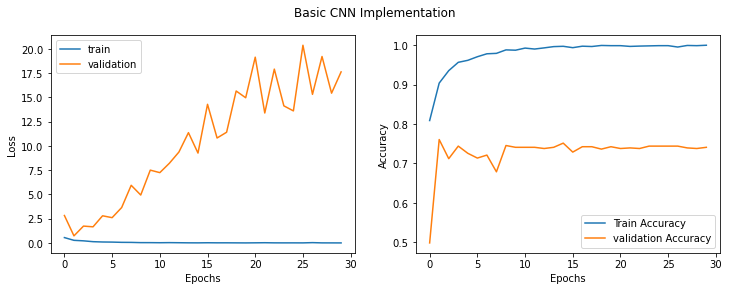

In [ ]:
#Plot Training Loss vs Validation Loss
def plot_history(history_model,title_name):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle('{}'.format(title_name))
    ax1.plot(history_model.history['loss'],label='train')
    ax1.plot(history_model.history['val_loss'],label='validation')
    ax1.legend()
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.plot(history_model.history['accuracy'],label='Train Accuracy')                # LABEL IT HAS TRAINING_ACCURACY 
    ax2.plot(history_model.history['val_accuracy'],label='validation Accuracy')       # LABEL IT HAS VALIDATION_ACCURACY 
    ax2.legend()
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')     # CHANGE IT INTO ACCURACY 
    return True
plot_history(history_init,'Basic CNN Implementation')

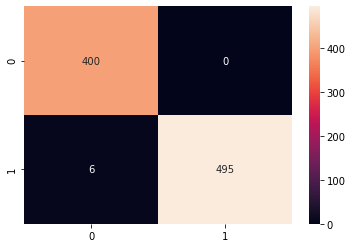

In [ ]:
##Model Evaulation
y_hat=(model_init.predict(test_imgs_scaled) > 0.5).astype("int32")
#y_hat=np.argmax(model_init.predict(test_imgs_scaled), axis=-1) #multi-class and if softmax at last-layer activation
cm=confusion_matrix(test_labels_enc,y_hat)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       1.00      0.99      0.99       501

    accuracy                           0.99       901
   macro avg       0.99      0.99      0.99       901
weighted avg       0.99      0.99      0.99       901



# CNN Model with Regularization

In [ ]:
def create_model_reg():
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),padding='SAME',activation='relu',
                    input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model
model_cnn_reg=create_model_reg()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [ ]:
model_cnn_reg.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_cnn_reg=model_cnn_reg.fit(x=train_imgs_scaled,y=train_labels_enc,
                 validation_split=0.15,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1)

Epoch 1/30
117/117 [==============================] - 52s 436ms/step - loss: 0.9938 - accuracy: 0.6981 - val_loss: 1.9283 - val_accuracy: 0.4894
Epoch 2/30
117/117 [==============================] - 50s 429ms/step - loss: 0.2540 - accuracy: 0.9054 - val_loss: 1.7586 - val_accuracy: 0.7091
Epoch 3/30
117/117 [==============================] - 50s 429ms/step - loss: 0.2256 - accuracy: 0.9101 - val_loss: 1.9845 - val_accuracy: 0.7197
Epoch 4/30
117/117 [==============================] - 50s 429ms/step - loss: 0.1658 - accuracy: 0.9354 - val_loss: 3.9712 - val_accuracy: 0.7258
Epoch 5/30
117/117 [==============================] - 50s 428ms/step - loss: 0.1170 - accuracy: 0.9554 - val_loss: 2.6123 - val_accuracy: 0.5909
Epoch 6/30
117/117 [==============================] - 50s 428ms/step - loss: 0.0934 - accuracy: 0.9590 - val_loss: 4.0270 - val_accuracy: 0.6818
Epoch 7/30
117/117 [==============================] - 50s 428ms/step - loss: 0.0770 - accuracy: 0.9740 - val_loss: 5.0996 - val_ac

True

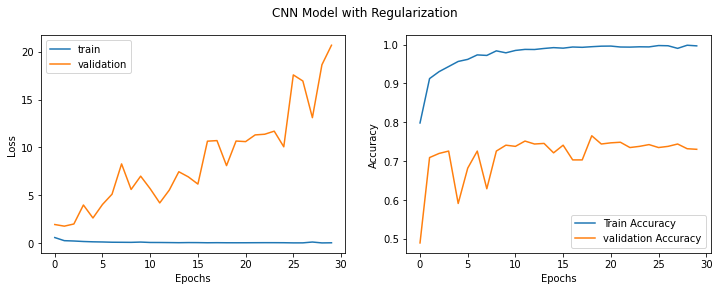

In [ ]:
plot_history(history_cnn_reg,'CNN Model with Regularization')

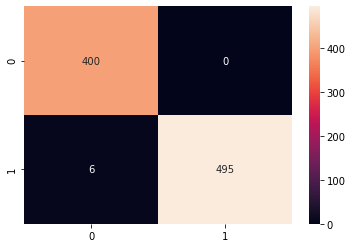

In [ ]:
##Model Evaulation
y_hat_reg=(model_init.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_reg)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_reg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       1.00      0.99      0.99       501

    accuracy                           0.99       901
   macro avg       0.99      0.99      0.99       901
weighted avg       0.99      0.99      0.99       901



# CNN Model with Image Augmentation


In [ ]:
##Image Data Augementation: Import All the Images in the directory
##Generator for train and validation data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
target_image_size=(150,150)
train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.15,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 rotation_range=15,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 fill_mode='nearest',
                                 horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)
tst_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_datagen.flow_from_directory(train_path,
                                             target_size=target_image_size,
                                             subset='training',
                                             batch_size=batch_size,
                                             class_mode='binary')
val_data=train_datagen.flow_from_directory(train_path,
                                           target_size=target_image_size,
                                           subset='validation',
                                           batch_size=batch_size,
                                           class_mode='binary')
test_data=tst_datagen.flow_from_directory(test_path,
                                          target_size=target_image_size,
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 3740 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 901 images belonging to 2 classes.


In [ ]:
len_traindata=train_data.samples
print(len_traindata)

3740


In [ ]:
len(train_data)

117

In [ ]:
print(train_data.index_generator)

<generator object Iterator._flow_index at 0x000001C71FE0AC80>


In [ ]:
print('Image Shape: {}'.format(train_data.image_shape))
print('Label: {}'.format(train_data.class_indices))
input_shape=train_data.image_shape

Image Shape: (150, 150, 3)
Label: {'COVID19': 0, 'NORMAL': 1}


In [ ]:
def create_model_aug2():
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),padding='SAME',activation='relu',
                    input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,kernel_size=(3,3),padding='SAME',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model
model_cnn_aug2=create_model_aug2()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

In [ ]:
model_cnn_aug2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_cnn_aug2=model_cnn_aug2.fit(train_data,
                                  validation_data=val_data,
                                  steps_per_epoch=len_traindata//batch_size,
                                  epochs=epochs,
                                  verbose=1)

Epoch 1/30
116/116 [==============================] - 150s 1s/step - loss: 2.1022 - accuracy: 0.6371 - val_loss: 0.5435 - val_accuracy: 0.7652
Epoch 2/30
116/116 [==============================] - 147s 1s/step - loss: 0.5631 - accuracy: 0.7572 - val_loss: 0.4612 - val_accuracy: 0.8197
Epoch 3/30
116/116 [==============================] - 147s 1s/step - loss: 0.5358 - accuracy: 0.7834 - val_loss: 0.4588 - val_accuracy: 0.8288
Epoch 4/30
116/116 [==============================] - 148s 1s/step - loss: 0.4786 - accuracy: 0.7948 - val_loss: 0.4208 - val_accuracy: 0.8515
Epoch 5/30
116/116 [==============================] - 150s 1s/step - loss: 0.4398 - accuracy: 0.8053 - val_loss: 0.4603 - val_accuracy: 0.8333
Epoch 6/30
116/116 [==============================] - 148s 1s/step - loss: 0.4249 - accuracy: 0.8274 - val_loss: 0.4780 - val_accuracy: 0.8000
Epoch 7/30
116/116 [==============================] - 148s 1s/step - loss: 0.3983 - accuracy: 0.8341 - val_loss: 0.3780 - val_accuracy: 0.8591

True

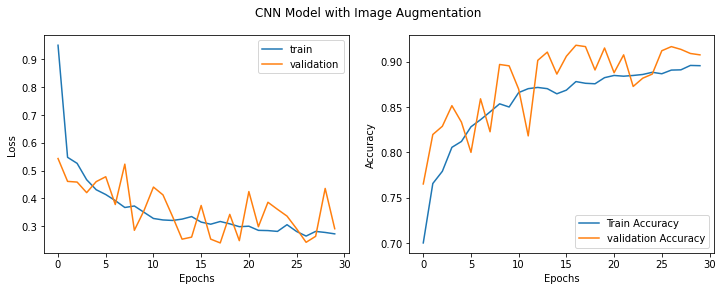

In [ ]:
plot_history(history_cnn_aug2,'CNN Model with Image Augmentation')

In [ ]:
##Model Evaluation
tst_loss,tst_acc=model_cnn_aug2.evaluate(test_data)
print('CNN Model with Image Agumentation Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

29/29 [==============================] - 30s 1s/step - loss: 0.3146 - accuracy: 0.9156
CNN Model with Image Agumentation Loss: 0.31459495425224304, Test Accuracy: 0.9156492948532104


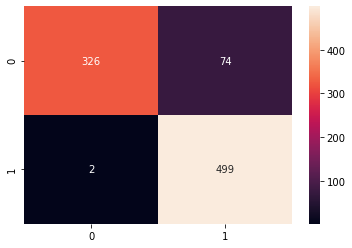

In [ ]:
##Model Evaulation
from sklearn.metrics import confusion_matrix
y_hat_aug2=(model_cnn_aug2.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_aug2)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_aug2))

              precision    recall  f1-score   support

           0       0.99      0.81      0.90       400
           1       0.87      1.00      0.93       501

    accuracy                           0.92       901
   macro avg       0.93      0.91      0.91       901
weighted avg       0.93      0.92      0.91       901



# VGG-16 Model Implementation

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten
#from tensorflow.keras.backend import K

In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',
         input_shape=input_shape)
plot_model(vgg,to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
##Avoid training existing weights, otherwise existing weights will be overwrite
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction_vgg=Dense(1,activation='sigmoid')(x)

In [ ]:
##Create Inception Model
from tensorflow.keras.models import Model
vgg_model=Model(inputs=vgg.input,outputs=prediction_vgg)
plot_model(vgg_model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
#vgg_model.trainable=False ##VGG-16 Freeze
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
vgg_model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
vgg_history=vgg_model.fit(train_data,
                          validation_data=val_data,
                          batch_size=batch_size,
                          steps_per_epoch=train_data.samples//batch_size,
                          #validation_steps=val_data.samples//batch_size,
                          epochs=epochs,
                          verbose=1)
#model_vgg.save('model_vgg.h5')

Epoch 1/30
116/116 [==============================] - 216s 2s/step - loss: 0.5023 - accuracy: 0.7669 - val_loss: 0.2392 - val_accuracy: 0.9091
Epoch 2/30
116/116 [==============================] - 212s 2s/step - loss: 0.3026 - accuracy: 0.8688 - val_loss: 0.2758 - val_accuracy: 0.8561
Epoch 3/30
116/116 [==============================] - 213s 2s/step - loss: 0.2931 - accuracy: 0.8741 - val_loss: 0.1810 - val_accuracy: 0.9394
Epoch 4/30
116/116 [==============================] - 218s 2s/step - loss: 0.2541 - accuracy: 0.8999 - val_loss: 0.1851 - val_accuracy: 0.9242
Epoch 5/30
116/116 [==============================] - 218s 2s/step - loss: 0.2712 - accuracy: 0.8951 - val_loss: 0.2096 - val_accuracy: 0.9121
Epoch 6/30
116/116 [==============================] - 225s 2s/step - loss: 0.2530 - accuracy: 0.8949 - val_loss: 0.2158 - val_accuracy: 0.9015
Epoch 7/30
116/116 [==============================] - 223s 2s/step - loss: 0.2484 - accuracy: 0.8983 - val_loss: 0.2256 - val_accuracy: 0.9227

True

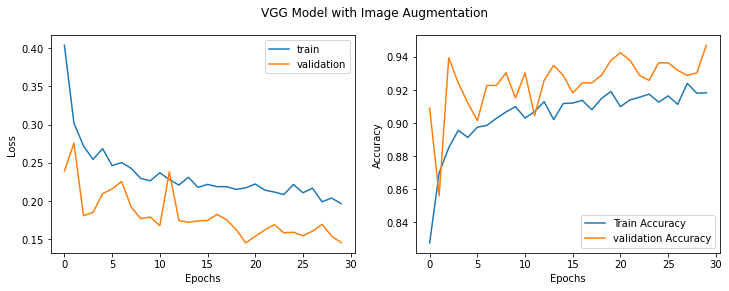

In [ ]:
plot_history(vgg_history,'VGG Model with Image Augmentation')

In [ ]:
##Model Evaluation
tst_loss,tst_acc=vgg_model.evaluate(test_data)
print('VGG16 Model Test Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

29/29 [==============================] - 47s 2s/step - loss: 0.1023 - accuracy: 0.9656
VGG16 Model Test Loss: 0.10229247808456421, Test Accuracy: 0.9655937552452087


In [ ]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional....,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPoo...,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional....,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional....,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPoo...,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional....,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional....,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional....,block3_conv3,False


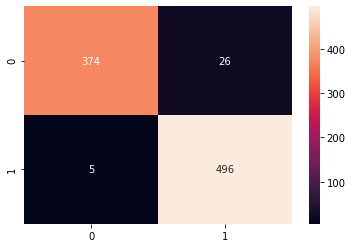

In [ ]:
##Model Evaulation
y_hat_vgg=(vgg_model.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_vgg)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_vgg))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       400
           1       0.95      0.99      0.97       501

    accuracy                           0.97       901
   macro avg       0.97      0.96      0.96       901
weighted avg       0.97      0.97      0.97       901



# InceptionV3 Model Implementation

In [ ]:
!pip install pydot
!pip install graphviz

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten

In [ ]:
inception=InceptionV3(include_top=False,weights='imagenet',
         input_shape=input_shape)
plot_model(inception,to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
##Avoid training existing weights, otherwise existing weights will be overwrite
for layer in inception.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(inception.output)
prediction_inception=Dense(1,activation='sigmoid')(x)

In [ ]:
##Create Inception Model
from tensorflow.keras.models import Model
inception_model=Model(inputs=inception.input,outputs=prediction_inception)
plot_model(inception_model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
#inception_model.trainable=False ##InceptionV3 Freeze
inception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_9[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
inception_model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
inception_history=inception_model.fit(train_data,
                          validation_data=val_data,
                          batch_size=batch_size,
                          steps_per_epoch=train_data.samples//batch_size,
                          #validation_steps=val_data.samples//batch_size,
                          epochs=epochs,
                          verbose=1)
#inception_model.save('model_inception.h5')

Epoch 1/30
116/116 [==============================] - 156s 1s/step - loss: 0.7038 - accuracy: 0.6830 - val_loss: 0.3490 - val_accuracy: 0.8530
Epoch 2/30
116/116 [==============================] - 150s 1s/step - loss: 0.4070 - accuracy: 0.8250 - val_loss: 0.2559 - val_accuracy: 0.8894
Epoch 3/30
116/116 [==============================] - 150s 1s/step - loss: 0.3818 - accuracy: 0.8342 - val_loss: 0.2573 - val_accuracy: 0.8879
Epoch 4/30
116/116 [==============================] - 151s 1s/step - loss: 0.3135 - accuracy: 0.8697 - val_loss: 0.1984 - val_accuracy: 0.9167
Epoch 5/30
116/116 [==============================] - 155s 1s/step - loss: 0.3446 - accuracy: 0.8590 - val_loss: 0.2435 - val_accuracy: 0.8939
Epoch 6/30
116/116 [==============================] - 154s 1s/step - loss: 0.3062 - accuracy: 0.8770 - val_loss: 0.2331 - val_accuracy: 0.8803
Epoch 7/30
116/116 [==============================] - 153s 1s/step - loss: 0.3242 - accuracy: 0.8695 - val_loss: 0.1750 - val_accuracy: 0.9318

True

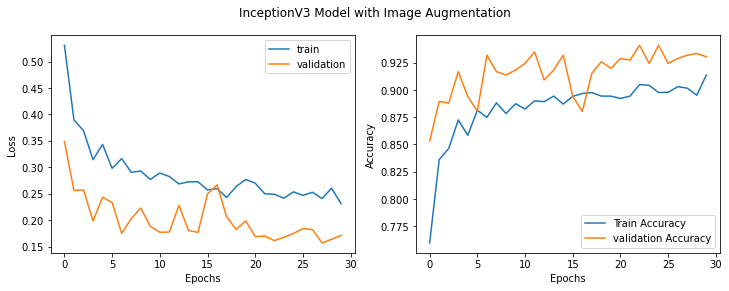

In [ ]:
plot_history(inception_history,'InceptionV3 Model with Image Augmentation')

In [ ]:
##Model Evaluation
tst_loss,tst_acc=inception_model.evaluate(test_data)
print('Inception Model Test Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

29/29 [==============================] - 33s 1s/step - loss: 0.1795 - accuracy: 0.9290
Inception Model Test Loss: 0.17949099838733673, Test Accuracy: 0.9289678335189819


In [ ]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in inception_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_2,False
1,<tensorflow.python.keras.layers.convolutional....,conv2d_9,False
2,<tensorflow.python.keras.layers.normalization_...,batch_normalization,False
3,<tensorflow.python.keras.layers.core.Activatio...,activation,False
4,<tensorflow.python.keras.layers.convolutional....,conv2d_10,False
...,...,...,...
308,<tensorflow.python.keras.layers.merge.Concaten...,concatenate_1,False
309,<tensorflow.python.keras.layers.core.Activatio...,activation_93,False
310,<tensorflow.python.keras.layers.merge.Concaten...,mixed10,False
311,<tensorflow.python.keras.layers.core.Flatten o...,flatten_4,True


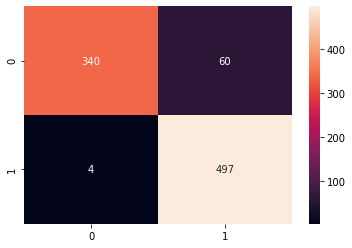

In [ ]:
##Model Evaulation
y_hat_inception=(inception_model.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_inception)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
##Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(test_labels_enc,y_hat_inception))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       400
           1       0.89      0.99      0.94       501

    accuracy                           0.93       901
   macro avg       0.94      0.92      0.93       901
weighted avg       0.93      0.93      0.93       901



# ResNet50 Model Implementation

In [ ]:
!pip install pydot
!pip install graphviz

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten

In [ ]:
resnet=ResNet50(include_top=False,weights='imagenet',
         input_shape=input_shape)
plot_model(resnet,to_file='model.png')

94773248/94765736 [==============================] - 22s 0us/step
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
##Avoid training existing weights, otherwise existing weights will be overwrite
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(resnet.output)
prediction_resnet=Dense(1,activation='sigmoid')(x)

In [ ]:
##Create Inception Model
from tensorflow.keras.models import Model
resnet_model=Model(inputs=resnet.input,outputs=prediction_resnet)
plot_model(resnet_model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
#resnet_model.trainable=False ##ResNet Freeze
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
resnet_model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
resnet_history=resnet_model.fit(train_data,
                          validation_data=val_data,
                          batch_size=batch_size,
                          steps_per_epoch=train_data.samples//batch_size,
                          #validation_steps=val_data.samples//batch_size,
                          epochs=epochs,
                          verbose=1)
#resnet_model.save('model_resnet.h5')

Epoch 1/30
116/116 [==============================] - 180s 2s/step - loss: 0.6875 - accuracy: 0.5555 - val_loss: 0.6147 - val_accuracy: 0.7561
Epoch 2/30
116/116 [==============================] - 172s 1s/step - loss: 0.6267 - accuracy: 0.6898 - val_loss: 0.5641 - val_accuracy: 0.8076
Epoch 3/30
116/116 [==============================] - 171s 1s/step - loss: 0.5953 - accuracy: 0.7169 - val_loss: 0.5366 - val_accuracy: 0.8076
Epoch 4/30
116/116 [==============================] - 174s 1s/step - loss: 0.5769 - accuracy: 0.7377 - val_loss: 0.5042 - val_accuracy: 0.8303
Epoch 5/30
116/116 [==============================] - 175s 2s/step - loss: 0.5584 - accuracy: 0.7350 - val_loss: 0.4845 - val_accuracy: 0.8424
Epoch 6/30
116/116 [==============================] - 175s 2s/step - loss: 0.5487 - accuracy: 0.7377 - val_loss: 0.4866 - val_accuracy: 0.8167
Epoch 7/30
116/116 [==============================] - 176s 2s/step - loss: 0.5483 - accuracy: 0.7342 - val_loss: 0.4759 - val_accuracy: 0.8288

True

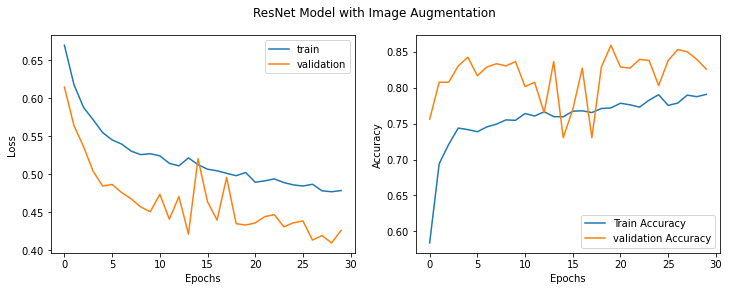

In [ ]:
plot_history(resnet_history,'ResNet Model with Image Augmentation')

In [ ]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_3,False
1,<tensorflow.python.keras.layers.convolutional....,conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional....,conv1_conv,False
3,<tensorflow.python.keras.layers.normalization_...,conv1_bn,False
4,<tensorflow.python.keras.layers.core.Activatio...,conv1_relu,False
...,...,...,...
172,<tensorflow.python.keras.layers.normalization_...,conv5_block3_3_bn,False
173,<tensorflow.python.keras.layers.merge.Add obje...,conv5_block3_add,False
174,<tensorflow.python.keras.layers.core.Activatio...,conv5_block3_out,False
175,<tensorflow.python.keras.layers.core.Flatten o...,flatten_5,True


In [ ]:
##Model Evaluation
tst_loss,tst_acc=resnet_model.evaluate(test_data)
print('ResNet Model Test Loss: {}, Test Accuracy: {}'.format(tst_loss,tst_acc))

29/29 [==============================] - 37s 1s/step - loss: 0.4274 - accuracy: 0.8479
ResNet Model Test Loss: 0.4274190664291382, Test Accuracy: 0.8479467034339905


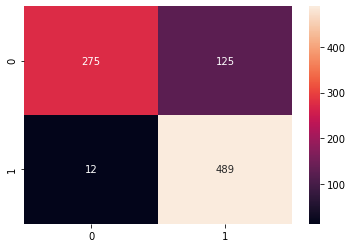

In [ ]:
##Model Evaulation
y_hat_resnet=(resnet_model.predict(test_imgs_scaled) > 0.5).astype("int32")
cm=confusion_matrix(test_labels_enc,y_hat_resnet)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# NEXT IMPLEMANTATION STAGE ___  CODE 1 :  BEGINS ,  NOTE : IN THIS PHASE USE SOFTMAX ACTIVATION FUNCTION.